In [3]:
pip install python-okx

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
fiona 1.9.5 requires click~=8.0, but you have click 7.1.2 which is incompatible.
poetry 1.3.2 requires importlib-metadata<5.0,>=4.4; python_version < "3.10", but you have importlib-metadata 7.0.1 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install okx

  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 493.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.1/135.1 kB 898.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 1.8 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 4.0 MB/s eta 0:00:0000:0100:01
Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.2
    Uninstalling numpy-1.22.2:
      Successfully uninstalled numpy-1.22.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2
ERROR: pip's dependency resolver does not currently take

In [2]:
from okx.api import Account
from okx.api import Trade
from okx_api import Market as Market_api
from pprint import pprint
import json
import os
import time
import math
from dotenv import load_dotenv
from okx.app import OkxSPOT
load_dotenv()

True

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as smt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime

In [5]:
market = Market_api(key = '', secret = '', passphrase = '', flag = '0')
okxSPOT = OkxSPOT(
    key="",
    secret="",
    passphrase="",
)

In [18]:
print(market.get_history_candles.__doc__)


        https://www.okx.com/docs-v5/zh/#rest-api-market-data-get-candlesticks-history

        请求参数：
        Parameter         	Type    	Required	Description
        instId            	String  	是       	产品ID，如BTC-USD-200927
        after             	String  	否       	请求此时间戳之前（更旧的数据）的分页内容，传的值为对应接口的ts
        before            	String  	否       	请求此时间戳之后（更新的数据）的分页内容，传的值为对应接口的ts
        bar               	String  	否       	时间粒度，默认值1m如 /3m/5m/15m/30m/1H/2H/4H]香港时间开盘价k线：[6H/12H/1D/2D/3D/1W/1M/3M]UTC时间开盘价k线：[6Hutc/12Hutc/1Dutc/2Dutc/3Dutc/1Wutc/1Mutc/3Mutc]
        limit             	String  	否       	分页返回的结果集数量，最大为100，不填默认返回100条
        


In [42]:
# https://www.okx.com/docs-v5/zh/?python#order-book-trading-market-data-get-candlesticks-history
columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'volCcy', 'volCcyQuote', 'confirm']
date_string_after = ['2023-1-31','2023-2-28','2023-3-31','2023-4-30','2023-5-31',
                     '2023-6-30','2023-7-31','2023-8-31','2023-9-30','2023-10-31','2023-11-30','2023-12-31']

full_data = pd.DataFrame(columns = ['open', 'high', 'low', 'close'])

for m in range(1, 13):
    
    month = "2023-" + str(m) + "-1"
    time_before = datetime.strptime(month, "%Y-%m-%d").timestamp()
    time_after = datetime.strptime(date_string_after[m-1], "%Y-%m-%d").timestamp()

    result = market.get_history_candles(
        instId='BTC-USDT',
        before=str(round(time_before*1000)), after=str(round(time_after*1000)), 
        bar='1D'
    )
    # print(len(result['data']))
    data = pd.DataFrame(result['data'], columns = columns)
    data['date'] = pd.to_datetime(data['timestamp'], unit = 'ms')
    data.sort_values(by='date', inplace=True)
    data.set_index('date', inplace = True)
    data[['open', 'high', 'low', 'close']] = data[['open', 'high', 'low', 'close']].apply(pd.to_numeric)
    data.drop(['volume', 'timestamp', 'confirm', 'volCcyQuote', 'volCcy'], axis=1, inplace = True)
    full_data = pd.concat([full_data, data])
    # print(data)
    # arima_data = data["open"]
    
print(full_data)

/var/folders/w2/_g9w5yys0f171q4qqm469z1h0000gn/T/ipykernel_24532/78217963.py:21: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['date'] = pd.to_datetime(data['timestamp'], unit = 'ms')
/var/folders/w2/_g9w5yys0f171q4qqm469z1h0000gn/T/ipykernel_24532/78217963.py:26: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  full_data = pd.concat([full_data, data])
/var/folders/w2/_g9w5yys0f171q4qqm469z1h0000gn/T/ipykernel_24532/78217963.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries i

                            open     high      low    close
2023-01-01 16:00:20.480  16560.0  16768.4  16548.1  16735.5
2023-01-02 15:59:56.928  16735.4  16799.3  16621.3  16679.8
2023-01-03 15:59:33.376  16679.8  16915.3  16610.4  16855.0
2023-01-04 15:59:09.824  16855.8  16988.0  16760.1  16846.8
2023-01-05 16:00:57.344  16846.8  16876.7  16680.7  16843.2
...                          ...      ...      ...      ...
2023-12-25 15:59:37.472  43616.8  43718.5  42111.0  42392.8
2023-12-26 15:59:13.920  42392.8  43227.7  41610.0  42977.9
2023-12-27 16:01:01.440  42979.6  43788.6  42398.0  42444.9
2023-12-28 16:00:37.888  42445.2  43113.6  42105.3  42266.2
2023-12-29 16:00:14.336  42266.1  42449.6  41267.1  42374.8

[341 rows x 4 columns]


/var/folders/w2/_g9w5yys0f171q4qqm469z1h0000gn/T/ipykernel_24532/78217963.py:21: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['date'] = pd.to_datetime(data['timestamp'], unit = 'ms')


<AxesSubplot: >

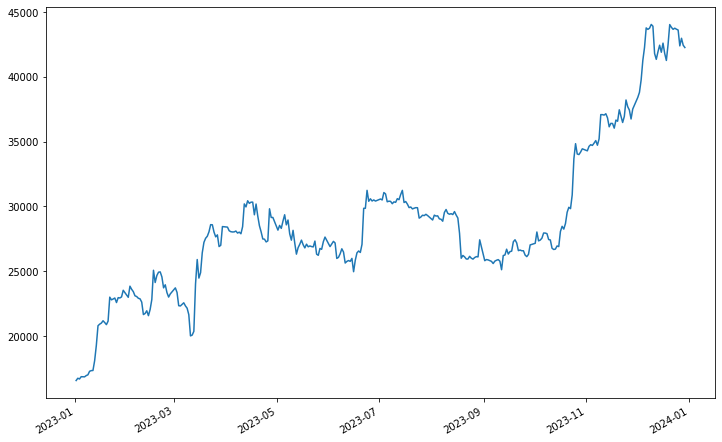

In [43]:
full_data['open'].plot(figsize=(12,8))

### There are four plots, each means:
1. open price
2. long-term trand
3. seasonal
4. residual

<Figure size 432x288 with 0 Axes>

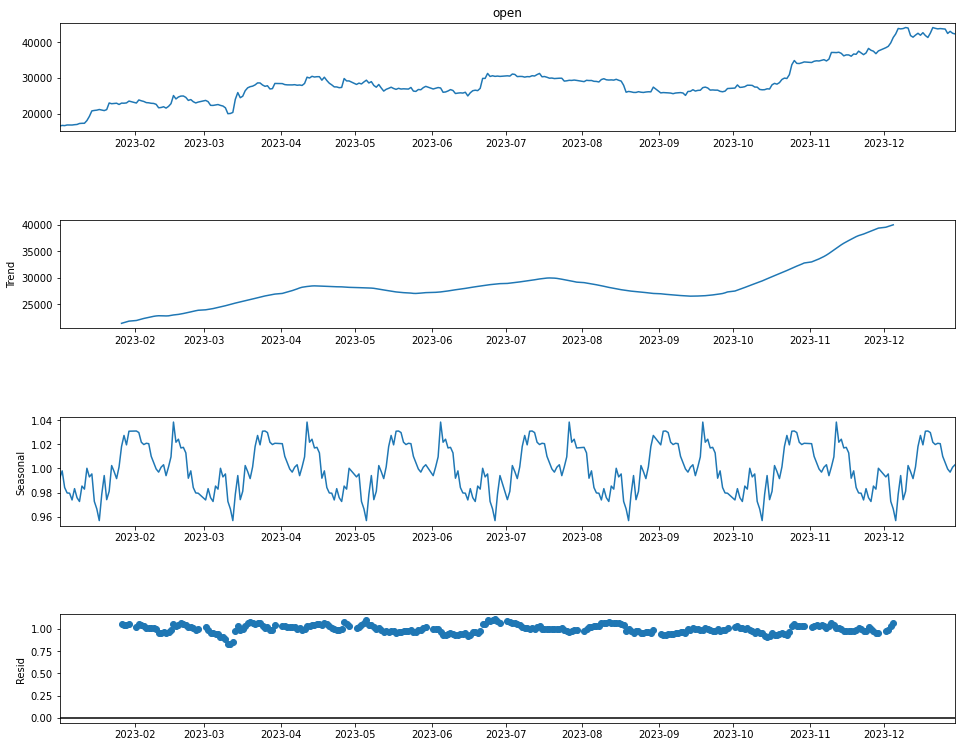

In [45]:
result_add = seasonal_decompose(full_data['open'], model = 'multiplicative', period = 50)
with plt.rc_context({'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    fig = plt.figure()  
    fig = result_add.plot()  
    fig.set_size_inches(15, 12)